# Linear regression

**References**:
- https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py
- https://en.wikipedia.org/wiki/Linear_regression

### Setup

#### Load packages / modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim

#### Generate training dataset

In [2]:
n_examples = 50
slope = 2.0
bias = 0.3
noise_std = 0.2

In [3]:
x_train = np.random.rand(n_examples,1)
noise = np.random.randn(n_examples,1)*noise_std
y_train = x_train*slope + bias + noise

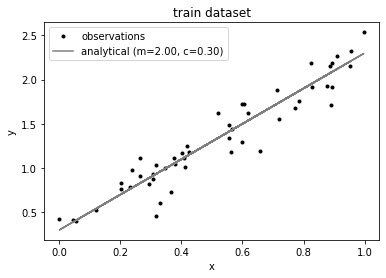

In [4]:
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'k.', label='observations')
ax.plot(x_train, x_train*slope + bias, 'tab:gray',
        label='analytical (m={:.2f}, c={:.2f})'.format(slope, bias))
ax.set(xlabel='x', ylabel='y',
       title='train dataset');
ax.legend();

### Setup model

#### Hyperparameters

In [5]:
n_features = 1 # number of trainable parameters (+ bias)
num_epochs = 100
learning_rate = 0.2

#### Model, Loss and Optimizer

In [6]:
# Linear regression model
model = nn.Linear(in_features=n_features, out_features=n_features)

# Loss and optimizer
criterion = nn.MSELoss() # Mean-Square Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Stochastic gradient-descent

### Train the model

In [7]:
loss_history = []
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    x = torch.from_numpy(x_train.astype('float32'))
    y = torch.from_numpy(y_train.astype('float32'))

    # Forward pass
    y_pred = model(x) # prediction step
    loss = criterion(y_pred, y)
    
    # Backward and optimize
    optimizer.zero_grad() # reset gradient
    loss.backward() # backward propogation 
    optimizer.step() # update gradient
    
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [10/100], Loss: 0.1030
Epoch [20/100], Loss: 0.0765
Epoch [30/100], Loss: 0.0599
Epoch [40/100], Loss: 0.0494
Epoch [50/100], Loss: 0.0427
Epoch [60/100], Loss: 0.0386
Epoch [70/100], Loss: 0.0359
Epoch [80/100], Loss: 0.0343
Epoch [90/100], Loss: 0.0332
Epoch [100/100], Loss: 0.0326


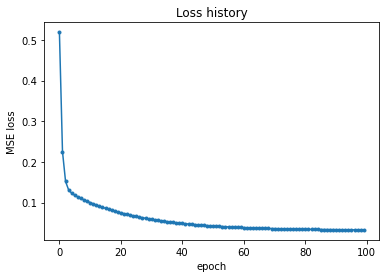

In [8]:
fig, ax = plt.subplots()
ax.plot(loss_history, '.-')
ax.set(xlabel='epoch', ylabel='MSE loss',
       title='Loss history');

### Predict and evaluate

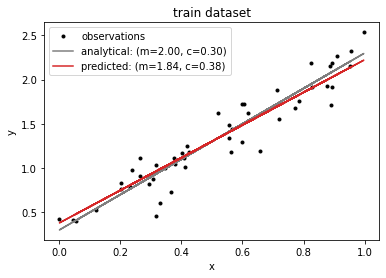

In [9]:
# Plot the graph
predict = model(torch.from_numpy(x_train.astype('float32'))).detach().numpy()

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'k.', label='observations')
ax.plot(x_train, x_train*slope + bias, 'tab:gray',
        label='analytical: (m={:.2f}, c={:.2f})'.format(slope, bias))
ax.plot(x_train, predict, 'tab:red', 
        label='predicted: (m={:.2f}, c={:.2f})'.format(*[param.detach().item() for param in model.parameters()]))
ax.set(xlabel='x', ylabel='y',
       title='train dataset');
ax.legend()

### Save model

In [10]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')